In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PARAM_HVR import mean_rr,mean_hr,sdnn, sdsd, rmssd, rmssd_sdsd, time_domain_analysis, poincare, stress_index, res_index, pns_index
from PARAM_HVR import sns_index, iterative_sd, iterative_mean, frequency_domian, countPairsWithDiffK,kurtose,skewness,relativeRR
from entropy import *

In [2]:
P1_data = pd.read_csv('0. interim/swell/rri/p1.csv')

In [3]:
time_sec = P1_data['Time']
time_min =P1_data['Time']/60
RR = P1_data['rri']

In [30]:
for t in time_min:
        print(t)

0.02109375
0.025260416666666667
0.029427083333333333
0.03359375
0.037760416666666664
0.04192708333333333
0.04609375
0.05026041666666667
0.054427083333333334
0.05859375
0.06276041666666667
0.06692708333333333
0.07109375
0.07526041666666666
0.07942708333333333
0.08359375
0.08776041666666666
0.09192708333333334
0.09609375
0.10026041666666667
0.10442708333333334
0.10859375
0.11276041666666667
0.11692708333333333
0.12109375
0.12526041666666668
0.12942708333333333
0.13359375
0.13776041666666666
0.14192708333333334
0.14609375
0.15026041666666667
0.15442708333333333
0.15859375
0.16276041666666666
0.16692708333333334
0.17109375
0.17526041666666667
0.17942708333333332
0.18359375
0.18776041666666668
0.19192708333333333
0.19609375
0.20026041666666666
0.20442708333333334
0.20859375
0.21276041666666667
0.21692708333333333
0.22109375
0.22526041666666666
0.22942708333333334
0.23359375
0.23776041666666667
0.24192708333333332
0.24609375
0.25026041666666665
0.25442708333333336
0.25859375
0.26276041666666

5.2919271666666665
5.296093833333333
5.300260499999999
5.304427166666667
5.308593833333333
5.3127604999999996
5.316927166666667
5.321093833333333
5.3252605
5.329427166666666
5.3335938333333335
5.3377605
5.341927166666666
5.346093833333333
5.3502605
5.3544271666666665
5.358593833333333
5.362760499999999
5.366927166666667
5.371093833333333
5.3752604999999996
5.379427166666667
5.383593833333333
5.3877605
5.391927166666666
5.3960938333333335
5.4002605
5.404427166666666
5.408593833333333
5.4127605
5.4169271666666665
5.421093833333333
5.425260499999999
5.429427166666667
5.433593833333333
5.4377604999999996
5.441927166666667
5.446093833333333
5.4502605
5.454427166666666
5.4585938333333335
5.4627605
5.466927166666666
5.471093833333333
5.4752605
5.4794271666666665
5.483593833333333
5.487760499999999
5.491927166666667
5.496093833333333
5.5002604999999996
5.504427166666667
5.508593833333333
5.5127605
5.516927166666666
5.5210938333333335
5.5252605
5.529427166666666
5.533593833333333
5.5377605
5.54

9.458593833333333
9.4627605
9.466927166666666
9.471093833333333
9.4752605
9.479427166666666
9.483593833333334
9.4877605
9.491927166666667
9.496093833333333
9.5002605
9.504427166666666
9.508593833333332
9.5127605
9.516927166666667
9.521093833333333
9.5252605
9.529427166666666
9.533593833333333
9.5377605
9.541927166666666
9.546093833333334
9.5502605
9.554427166666667
9.558593833333333
9.5627605
9.566927166666666
9.571093833333332
9.5752605
9.579427166666667
9.583593833333333
9.5877605
9.591927166666666
9.596093833333333
9.6002605
9.604427166666666
9.608593833333334
9.6127605
9.616927166666667
9.621093833333333
9.6252605
9.629427166666666
9.633593833333332
9.6377605
9.641927166666667
9.646093833333333
9.6502605
9.654427166666666
9.658593833333333
9.6627605
9.666927166666666
9.671093833333334
9.6752605
9.679427166666667
9.683593833333333
9.6877605
9.691927166666666
9.696093833333332
9.7002605
9.704427166666667
9.708593833333333
9.7127605
9.716927166666666
9.721093833333333
9.7252605
9.7294

13.621093833333333
13.6252605
13.629427166666666
13.633593833333332
13.6377605
13.641927166666667
13.646093833333333
13.6502605
13.654427166666666
13.658593833333333
13.6627605
13.666927166666666
13.671093833333334
13.6752605
13.679427166666667
13.683593833333333
13.6877605
13.691927166666666
13.696093833333332
13.7002605
13.704427166666667
13.708593833333333
13.7127605
13.716927166666666
13.721093833333333
13.7252605
13.729427166666666
13.733593833333334
13.7377605
13.741927166666667
13.746093833333333
13.7502605
13.754427166666666
13.758593833333332
13.7627605
13.766927166666667
13.771093833333333
13.7752605
13.779427166666666
13.783593833333333
13.7877605
13.791927166666666
13.796093833333334
13.8002605
13.804427166666667
13.808593833333333
13.8127605
13.816927166666666
13.821093833333332
13.8252605
13.829427166666667
13.833593833333333
13.8377605
13.841927166666666
13.846093833333333
13.8502605
13.854427166666666
13.858593833333334
13.8627605
13.866927166666667
13.871093833333333
1

19.87109333333333
19.87526
19.879426666666667
19.883593333333334
19.88776
19.891926666666667
19.896093333333333
19.90026
19.904426666666666
19.908593333333332
19.91276
19.916926666666665
19.92109333333333
19.925259999999998
19.929426666666664
19.93359333333333
19.93776
19.941926666666667
19.946093333333334
19.95026
19.954426666666667
19.958593333333333
19.96276
19.966926666666666
19.971093333333332
19.97526
19.979426666666665
19.98359333333333
19.987759999999998
19.991926666666664
19.99609333333333
20.00026
20.004426666666667
20.008593333333334
20.01276
20.016926666666667
20.021093333333333
20.02526
20.029426666666666
20.033593333333332
20.03776
20.041926666666665
20.04609333333333
20.050259999999998
20.054426666666664
20.05859333333333
20.06276
20.066926666666667
20.071093333333334
20.07526
20.079426666666667
20.083593333333333
20.08776
20.091926666666666
20.096093333333332
20.10026
20.104426666666665
20.10859333333333
20.112759999999998
20.116926666666664
20.12109333333333
20.12526
2

24.033593333333332
24.03776
24.041926666666665
24.04609333333333
24.050259999999998
24.054426666666664
24.05859333333333
24.06276
24.066926666666667
24.071093333333334
24.07526
24.079426666666667
24.083593333333333
24.08776
24.091926666666666
24.096093333333332
24.10026
24.104426666666665
24.10859333333333
24.112759999999998
24.116926666666664
24.12109333333333
24.12526
24.129426666666667
24.133593333333334
24.13776
24.141926666666667
24.146093333333333
24.15026
24.154426666666666
24.158593333333332
24.16276
24.166926666666665
24.17109333333333
24.175259999999998
24.179426666666664
24.18359333333333
24.18776
24.191926666666667
24.196093333333334
24.20026
24.204426666666667
24.208593333333333
24.21276
24.216926666666666
24.221093333333332
24.22526
24.229426666666665
24.23359333333333
24.237759999999998
24.241926666666664
24.24609333333333
24.25026
24.254426666666667
24.258593333333334
24.26276
24.266926666666667
24.271093333333333
24.27526
24.279426666666666
24.283593333333332
24.28776


30.283593333333332
30.28776
30.291926666666665
30.29609333333333
30.300259999999998
30.304426666666664
30.30859333333333
30.31276
30.316926666666667
30.321093333333334
30.32526
30.329426666666667
30.333593333333333
30.33776
30.341926666666666
30.346093333333332
30.35026
30.354426666666665
30.35859333333333
30.362759999999998
30.366926666666664
30.37109333333333
30.37526
30.379426666666667
30.383593333333334
30.38776
30.391926666666667
30.396093333333333
30.40026
30.404426666666666
30.408593333333332
30.41276
30.416926666666665
30.42109333333333
30.425259999999998
30.429426666666664
30.43359333333333
30.43776
30.441926666666667
30.446093333333334
30.45026
30.454426666666667
30.458593333333333
30.46276
30.466926666666666
30.471093333333332
30.47526
30.479426666666665
30.48359333333333
30.487759999999998
30.491926666666664
30.49609333333333
30.50026
30.504426666666667
30.508593333333334
30.51276
30.516926666666667
30.521093333333333
30.52526
30.529426666666666
30.533593333333332
30.53776


36.52942666666667
36.533593333333336
36.537760000000006
36.54192666666667
36.54609333333334
36.55026
36.55442666666667
36.558593333333334
36.562760000000004
36.56692666666667
36.57109333333334
36.57526
36.57942666666667
36.58359333333333
36.58776
36.59192666666667
36.596093333333336
36.600260000000006
36.60442666666667
36.60859333333334
36.61276
36.61692666666667
36.621093333333334
36.625260000000004
36.62942666666667
36.63359333333334
36.63776
36.64192666666667
36.64609333333333
36.65026
36.65442666666667
36.658593333333336
36.662760000000006
36.66692666666667
36.67109333333334
36.67526
36.67942666666667
36.683593333333334
36.687760000000004
36.69192666666667
36.69609333333334
36.70026
36.70442666666667
36.70859333333333
36.71276
36.71692666666667
36.721093333333336
36.725260000000006
36.72942666666667
36.73359333333334
36.73776
36.74192666666667
36.746093333333334
36.750260000000004
36.75442666666667
36.75859333333334
36.76276
36.76692666666667
36.77109333333333
36.77526
36.779426666

42.77942666666667
42.783593333333336
42.787760000000006
42.79192666666667
42.79609333333334
42.80026
42.80442666666667
42.808593333333334
42.812760000000004
42.81692666666667
42.82109333333334
42.82526
42.82942666666667
42.83359333333333
42.83776
42.84192666666667
42.846093333333336
42.850260000000006
42.85442666666667
42.85859333333334
42.86276
42.86692666666667
42.871093333333334
42.875260000000004
42.87942666666667
42.88359333333334
42.88776
42.89192666666667
42.89609333333333
42.90026
42.90442666666667
42.908593333333336
42.912760000000006
42.91692666666667
42.92109333333334
42.92526
42.92942666666667
42.933593333333334
42.937760000000004
42.94192666666667
42.94609333333334
42.95026
42.95442666666667
42.95859333333333
42.96276
42.96692666666667
42.971093333333336
42.975260000000006
42.97942666666667
42.98359333333334
42.98776
42.99192666666667
42.996093333333334
43.000260000000004
43.00442666666667
43.00859333333334
43.01276
43.01692666666667
43.02109333333333
43.02526
43.029426666

49.02526
49.02942666666667
49.033593333333336
49.037760000000006
49.04192666666667
49.04609333333334
49.05026
49.05442666666667
49.058593333333334
49.062760000000004
49.06692666666667
49.07109333333334
49.07526
49.07942666666667
49.08359333333333
49.08776
49.09192666666667
49.096093333333336
49.100260000000006
49.10442666666667
49.10859333333334
49.11276
49.11692666666667
49.121093333333334
49.125260000000004
49.12942666666667
49.13359333333334
49.13776
49.14192666666667
49.14609333333333
49.15026
49.15442666666667
49.158593333333336
49.162760000000006
49.16692666666667
49.17109333333334
49.17526
49.17942666666667
49.183593333333334
49.187760000000004
49.19192666666667
49.19609333333334
49.20026
49.20442666666667
49.20859333333333
49.21276
49.21692666666667
49.221093333333336
49.225260000000006
49.22942666666667
49.23359333333334
49.23776
49.24192666666667
49.246093333333334
49.250260000000004
49.25442666666667
49.25859333333334
49.26276
49.26692666666667
49.27109333333333
49.27526
49.

55.27526
55.27942666666667
55.283593333333336
55.287760000000006
55.29192666666667
55.29609333333334
55.30026
55.30442666666667
55.308593333333334
55.312760000000004
55.31692666666667
55.32109333333334
55.32526
55.32942666666667
55.33359333333333
55.33776
55.34192666666667
55.346093333333336
55.350260000000006
55.35442666666667
55.35859333333334
55.36276
55.36692666666667
55.371093333333334
55.375260000000004
55.37942666666667
55.38359333333334
55.38776
55.39192666666667
55.39609333333333
55.40026
55.40442666666667
55.408593333333336
55.412760000000006
55.41692666666667
55.42109333333334
55.42526
55.42942666666667
55.433593333333334
55.437760000000004
55.44192666666667
55.44609333333334
55.45026
55.45442666666667
55.45859333333333
55.46276
55.46692666666667
55.471093333333336
55.475260000000006
55.47942666666667
55.48359333333334
55.48776
55.49192666666667
55.496093333333334
55.500260000000004
55.50442666666667
55.50859333333334
55.51276
55.51692666666667
55.52109333333333
55.52526
55.

60.26276
60.26692666666667
60.27109333333333
60.27526
60.27942666666667
60.283593333333336
60.287760000000006
60.29192666666667
60.29609333333334
60.30026
60.30442666666667
60.308593333333334
60.312760000000004
60.31692666666667
60.32109333333334
60.32526
60.32942666666667
60.33359333333333
60.33776
60.34192666666667
60.346093333333336
60.350260000000006
60.35442666666667
60.35859333333334
60.36276
60.36692666666667
60.371093333333334
60.375260000000004
60.37942666666667
60.38359333333334
60.38776
60.39192666666667
60.39609333333333
60.40026
60.40442666666667
60.408593333333336
60.412760000000006
60.41692666666667
60.42109333333334
60.42526
60.42942666666667
60.433593333333334
60.437760000000004
60.44192666666667
60.44609333333334
60.45026
60.45442666666667
60.45859333333333
60.46276
60.46692666666667
60.471093333333336
60.475260000000006
60.47942666666667
60.48359333333334
60.48776
60.49192666666667
60.496093333333334
60.500260000000004
60.50442666666667
60.50859333333334
60.51276
60.

64.34609333333334
64.35026
64.35442666666667
64.35859333333333
64.36276000000001
64.36692666666667
64.37109333333333
64.37526
64.37942666666667
64.38359333333334
64.38776
64.39192666666666
64.39609333333334
64.40026
64.40442666666667
64.40859333333334
64.41276
64.41692666666667
64.42109333333333
64.42526000000001
64.42942666666667
64.43359333333333
64.43776
64.44192666666667
64.44609333333334
64.45026
64.45442666666666
64.45859333333334
64.46276
64.46692666666667
64.47109333333334
64.47526
64.47942666666667
64.48359333333333
64.48776000000001
64.49192666666667
64.49609333333333
64.50026
64.50442666666667
64.50859333333334
64.51276
64.51692666666666
64.52109333333334
64.52526
64.52942666666667
64.53359333333334
64.53776
64.54192666666667
64.54609333333333
64.55026000000001
64.55442666666667
64.55859333333333
64.56276
64.56692666666667
64.57109333333334
64.57526
64.57942666666666
64.58359333333334
64.58776
64.59192666666667
64.59609333333334
64.60026
64.60442666666667
64.60859333333333
6

68.09192666666667
68.09609333333334
68.10026
68.10442666666667
68.10859333333333
68.11276000000001
68.11692666666667
68.12109333333333
68.12526
68.12942666666667
68.13359333333334
68.13776
68.14192666666666
68.14609333333334
68.15026
68.15442666666667
68.15859333333334
68.16276
68.16692666666667
68.17109333333333
68.17526000000001
68.17942666666667
68.18359333333333
68.18776
68.19192666666667
68.19609333333334
68.20026
68.20442666666666
68.20859333333334
68.21276
68.21692666666667
68.22109333333334
68.22526
68.22942666666667
68.23359333333333
68.23776000000001
68.24192666666667
68.24609333333333
68.25026
68.25442666666667
68.25859333333334
68.26276
68.26692666666666
68.27109333333333
68.27525999999999
68.27942666666667
68.28359333333333
68.28775999999999
68.29192666666667
68.29609333333333
68.30026
68.30442666666666
68.30859333333333
68.31276
68.31692666666666
68.32109333333332
68.32526
68.32942666666666
68.33359333333333
68.33775999999999
68.34192666666667
68.34609333333333
68.3502599

72.61276
72.61692666666666
72.62109333333333
72.62526
72.62942666666666
72.63359333333332
72.63776
72.64192666666666
72.64609333333333
72.65025999999999
72.65442666666667
72.65859333333333
72.66275999999999
72.66692666666667
72.67109333333333
72.67526
72.67942666666666
72.68359333333333
72.68776
72.69192666666666
72.69609333333332
72.70026
72.70442666666666
72.70859333333333
72.71275999999999
72.71692666666667
72.72109333333333
72.72525999999999
72.72942666666667
72.73359333333333
72.73776
72.74192666666666
72.74609333333333
72.75026
72.75442666666666
72.75859333333332
72.76276
72.76692666666666
72.77109333333333
72.77525999999999
72.77942666666667
72.78359333333333
72.78775999999999
72.79192666666667
72.79609333333333
72.80026
72.80442666666666
72.80859333333333
72.81276
72.81692666666666
72.82109333333332
72.82526
72.82942666666666
72.83359333333333
72.83775999999999
72.84192666666667
72.84609333333333
72.85025999999999
72.85442666666667
72.85859333333333
72.86276
72.86692666666666
7

76.35025999999999
76.35442666666667
76.35859333333333
76.36276
76.36692666666666
76.37109333333333
76.37526
76.37942666666666
76.38359333333332
76.38776
76.39192666666666
76.39609333333333
76.40025999999999
76.40442666666667
76.40859333333333
76.41275999999999
76.41692666666667
76.42109333333333
76.42526
76.42942666666666
76.43359333333333
76.43776
76.44192666666666
76.44609333333332
76.45026
76.45442666666666
76.45859333333333
76.46275999999999
76.46692666666667
76.47109333333333
76.47525999999999
76.47942666666667
76.48359333333333
76.48776
76.49192666666666
76.49609333333333
76.50026
76.50442666666666
76.50859333333332
76.51276
76.51692666666666
76.52109333333333
76.52525999999999
76.52942666666667
76.53359333333333
76.53775999999999
76.54192666666667
76.54609333333333
76.55026
76.55442666666666
76.55859333333333
76.56276
76.56692666666666
76.57109333333332
76.57526
76.57942666666666
76.58359333333333
76.58775999999999
76.59192666666667
76.59609333333333
76.60025999999999
76.6044266

82.34609333333333
82.35025999999999
82.35442666666667
82.35859333333333
82.36276
82.36692666666666
82.37109333333333
82.37526
82.37942666666666
82.38359333333332
82.38776
82.39192666666666
82.39609333333333
82.40025999999999
82.40442666666667
82.40859333333333
82.41275999999999
82.41692666666667
82.42109333333333
82.42526
82.42942666666666
82.43359333333333
82.43776
82.44192666666666
82.44609333333332
82.45026
82.45442666666666
82.45859333333333
82.46275999999999
82.46692666666667
82.47109333333333
82.47525999999999
82.47942666666667
82.48359333333333
82.48776
82.49192666666666
82.49609333333333
82.50026
82.50442666666666
82.50859333333332
82.51276
82.51692666666666
82.52109333333333
82.52525999999999
82.52942666666667
82.53359333333333
82.53775999999999
82.54192666666667
82.54609333333333
82.55026
82.55442666666666
82.55859333333333
82.56276
82.56692666666666
82.57109333333332
82.57526
82.57942666666666
82.58359333333333
82.58775999999999
82.59192666666667
82.59609333333333
82.6002599

88.59192666666667
88.59609333333333
88.60025999999999
88.60442666666667
88.60859333333333
88.61276
88.61692666666666
88.62109333333333
88.62526
88.62942666666666
88.63359333333332
88.63776
88.64192666666666
88.64609333333333
88.65025999999999
88.65442666666667
88.65859333333333
88.66275999999999
88.66692666666667
88.67109333333333
88.67526
88.67942666666666
88.68359333333333
88.68776
88.69192666666666
88.69609333333332
88.70026
88.70442666666666
88.70859333333333
88.71275999999999
88.71692666666667
88.72109333333333
88.72525999999999
88.72942666666667
88.73359333333333
88.73776
88.74192666666666
88.74609333333333
88.75026
88.75442666666666
88.75859333333332
88.76276
88.76692666666666
88.77109333333333
88.77525999999999
88.77942666666667
88.78359333333333
88.78775999999999
88.79192666666667
88.79609333333333
88.80026
88.80442666666666
88.80859333333333
88.81276
88.81692666666666
88.82109333333332
88.82526
88.82942666666666
88.83359333333333
88.83775999999999
88.84192666666667
88.8460933

94.84192666666667
94.84609333333333
94.85025999999999
94.85442666666667
94.85859333333333
94.86276
94.86692666666666
94.87109333333333
94.87526
94.87942666666666
94.88359333333332
94.88776
94.89192666666666
94.89609333333333
94.90025999999999
94.90442666666667
94.90859333333333
94.91275999999999
94.91692666666667
94.92109333333333
94.92526
94.92942666666666
94.93359333333333
94.93776
94.94192666666666
94.94609333333332
94.95026
94.95442666666666
94.95859333333333
94.96275999999999
94.96692666666667
94.97109333333333
94.97525999999999
94.97942666666667
94.98359333333333
94.98776
94.99192666666666
94.99609333333333
95.00026
95.00442666666666
95.00859333333332
95.01276
95.01692666666666
95.02109333333333
95.02525999999999
95.02942666666667
95.03359333333333
95.03775999999999
95.04192666666667
95.04609333333333
95.05026
95.05442666666666
95.05859333333333
95.06276
95.06692666666666
95.07109333333332
95.07526
95.07942666666666
95.08359333333333
95.08775999999999
95.09192666666667
95.0960933

100.71692666666667
100.72109333333333
100.72525999999999
100.72942666666667
100.73359333333333
100.73776
100.74192666666666
100.74609333333333
100.75026
100.75442666666666
100.75859333333332
100.76276
100.76692666666666
100.77109333333333
100.77525999999999
100.77942666666667
100.78359333333333
100.78775999999999
100.79192666666667
100.79609333333333
100.80026
100.80442666666666
100.80859333333333
100.81276
100.81692666666666
100.82109333333332
100.82526
100.82942666666666
100.83359333333333
100.83775999999999
100.84192666666667
100.84609333333333
100.85025999999999
100.85442666666667
100.85859333333333
100.86276
100.86692666666666
100.87109333333333
100.87526
100.87942666666666
100.88359333333332
100.88776
100.89192666666666
100.89609333333333
100.90025999999999
100.90442666666667
100.90859333333333
100.91275999999999
100.91692666666667
100.92109333333333
100.92526
100.92942666666666
100.93359333333333
100.93776
100.94192666666666
100.94609333333332
100.95026
100.95442666666666
100.95

104.70442666666666
104.70859333333333
104.71275999999999
104.71692666666667
104.72109333333333
104.72525999999999
104.72942666666667
104.73359333333333
104.73776
104.74192666666666
104.74609333333333
104.75026
104.75442666666666
104.75859333333332
104.76276
104.76692666666666
104.77109333333333
104.77525999999999
104.77942666666667
104.78359333333333
104.78775999999999
104.79192666666667
104.79609333333333
104.80026
104.80442666666666
104.80859333333333
104.81276
104.81692666666666
104.82109333333332
104.82526
104.82942666666666
104.83359333333333
104.83775999999999
104.84192666666667
104.84609333333333
104.85025999999999
104.85442666666667
104.85859333333333
104.86276
104.86692666666666
104.87109333333333
104.87526
104.87942666666666
104.88359333333332
104.88776
104.89192666666666
104.89609333333333
104.90025999999999
104.90442666666667
104.90859333333333
104.91275999999999
104.91692666666667
104.92109333333333
104.92526
104.92942666666666
104.93359333333333
104.93776
104.941926666666

109.41692666666667
109.42109333333333
109.42526
109.42942666666666
109.43359333333333
109.43776
109.44192666666666
109.44609333333332
109.45026
109.45442666666666
109.45859333333333
109.46275999999999
109.46692666666667
109.47109333333333
109.47525999999999
109.47942666666667
109.48359333333333
109.48776
109.49192666666666
109.49609333333333
109.50026
109.50442666666666
109.50859333333332
109.51276
109.51692666666666
109.52109333333333
109.52525999999999
109.52942666666667
109.53359333333333
109.53775999999999
109.54192666666667
109.54609333333333
109.55026
109.55442666666666
109.55859333333333
109.56276
109.56692666666666
109.57109333333332
109.57526
109.57942666666666
109.58359333333333
109.58775999999999
109.59192666666667
109.59609333333333
109.60025999999999
109.60442666666667
109.60859333333333
109.61276
109.61692666666666
109.62109333333333
109.62526
109.62942666666666
109.63359333333332
109.63776
109.64192666666666
109.64609333333333
109.65025999999999
109.65442666666667
109.65

114.01276
114.01692666666666
114.02109333333333
114.02525999999999
114.02942666666667
114.03359333333333
114.03775999999999
114.04192666666667
114.04609333333333
114.05026
114.05442666666666
114.05859333333333
114.06276
114.06692666666666
114.07109333333332
114.07526
114.07942666666666
114.08359333333333
114.08775999999999
114.09192666666667
114.09609333333333
114.10025999999999
114.10442666666667
114.10859333333333
114.11276
114.11692666666666
114.12109333333333
114.12526
114.12942666666666
114.13359333333332
114.13776
114.14192666666666
114.14609333333333
114.15025999999999
114.15442666666667
114.15859333333333
114.16275999999999
114.16692666666667
114.17109333333333
114.17526
114.17942666666666
114.18359333333333
114.18776
114.19192666666666
114.19609333333332
114.20026
114.20442666666666
114.20859333333333
114.21275999999999
114.21692666666667
114.22109333333333
114.22525999999999
114.22942666666667
114.23359333333333
114.23776
114.24192666666666
114.24609333333333
114.25026
114.25

119.82942666666666
119.83359333333333
119.83775999999999
119.84192666666667
119.84609333333333
119.85025999999999
119.85442666666667
119.85859333333333
119.86276
119.86692666666666
119.87109333333333
119.87526
119.87942666666666
119.88359333333332
119.88776
119.89192666666666
119.89609333333333
119.90025999999999
119.90442666666667
119.90859333333333
119.91275999999999
119.91692666666667
119.92109333333333
119.92526
119.92942666666666
119.93359333333333
119.93776
119.94192666666666
119.94609333333332
119.95026
119.95442666666666
119.95859333333333
119.96275999999999
119.96692666666667
119.97109333333333
119.97525999999999
119.97942666666667
119.98359333333333
119.98776
119.99192666666666
119.99609333333333
120.00026
120.00442666666666
120.00859333333332
120.01276
120.01692666666666
120.02109333333333
120.02525999999999
120.02942666666667
120.03359333333333
120.03775999999999
120.04192666666667
120.04609333333333
120.05026
120.05442666666666
120.05859333333333
120.06276
120.066926666666

125.57109333333332
125.57526
125.57942666666666
125.58359333333333
125.58775999999999
125.59192666666667
125.59609333333333
125.60025999999999
125.60442666666667
125.60859333333333
125.61276
125.61692666666666
125.62109333333333
125.62526
125.62942666666666
125.63359333333332
125.63776
125.64192666666666
125.64609333333333
125.65025999999999
125.65442666666667
125.65859333333333
125.66275999999999
125.66692666666667
125.67109333333333
125.67526
125.67942666666666
125.68359333333333
125.68776
125.69192666666666
125.69609333333332
125.70026
125.70442666666666
125.70859333333333
125.71275999999999
125.71692666666667
125.72109333333333
125.72525999999999
125.72942666666667
125.73359333333333
125.73776
125.74192666666666
125.74609333333333
125.75026
125.75442666666666
125.75859333333332
125.76276
125.76692666666666
125.77109333333333
125.77525999999999
125.77942666666667
125.78359333333333
125.78775999999999
125.79192666666667
125.79609333333333
125.80026
125.80442666666666
125.808593333333

131.03776
131.04192666666665
131.04609333333332
131.05026
131.05442666666667
131.05859333333333
131.06276
131.06692666666666
131.07109333333332
131.07526
131.07942666666665
131.08359333333334
131.08776
131.09192666666667
131.09609333333333
131.10026
131.10442666666665
131.10859333333332
131.11276
131.11692666666667
131.12109333333333
131.12526
131.12942666666666
131.13359333333332
131.13776
131.14192666666665
131.14609333333334
131.15026
131.15442666666667
131.15859333333333
131.16276
131.16692666666665
131.17109333333332
131.17526
131.17942666666667
131.18359333333333
131.18776
131.19192666666666
131.19609333333332
131.20026
131.20442666666665
131.20859333333334
131.21276
131.21692666666667
131.22109333333333
131.22526
131.22942666666665
131.23359333333332
131.23776
131.24192666666667
131.24609333333333
131.25026
131.25442666666666
131.25859333333332
131.26276
131.26692666666665
131.27109333333334
131.27526
131.27942666666667
131.28359333333333
131.28776
131.29192666666665
131.2960933

136.38776
136.39192666666665
136.39609333333334
136.40026
136.40442666666667
136.40859333333333
136.41276
136.41692666666665
136.42109333333332
136.42526
136.42942666666667
136.43359333333333
136.43776
136.44192666666666
136.44609333333332
136.45026
136.45442666666665
136.45859333333334
136.46276
136.46692666666667
136.47109333333333
136.47526
136.47942666666665
136.48359333333332
136.48776
136.49192666666667
136.49609333333333
136.50026
136.50442666666666
136.50859333333332
136.51276
136.51692666666665
136.52109333333334
136.52526
136.52942666666667
136.53359333333336
136.53776000000002
136.54192666666668
136.54609333333335
136.55026
136.55442666666667
136.55859333333333
136.56276
136.5669266666667
136.57109333333335
136.57526000000001
136.57942666666668
136.58359333333334
136.58776
136.59192666666667
136.59609333333336
136.60026000000002
136.60442666666668
136.60859333333335
136.61276
136.61692666666667
136.62109333333333
136.62526
136.6294266666667
136.63359333333335
136.63776000000

142.73776
142.74192666666667
142.74609333333333
142.75026
142.7544266666667
142.75859333333335
142.76276000000001
142.76692666666668
142.77109333333334
142.77526
142.77942666666667
142.78359333333336
142.78776000000002
142.79192666666668
142.79609333333335
142.80026
142.80442666666667
142.80859333333333
142.81276
142.8169266666667
142.82109333333335
142.82526000000001
142.82942666666668
142.83359333333334
142.83776
142.84192666666667
142.84609333333336
142.85026000000002
142.85442666666668
142.85859333333335
142.86276
142.86692666666667
142.87109333333333
142.87526
142.8794266666667
142.88359333333335
142.88776000000001
142.89192666666668
142.89609333333334
142.90026
142.90442666666667
142.90859333333336
142.91276000000002
142.91692666666668
142.92109333333335
142.92526
142.92942666666667
142.93359333333333
142.93776
142.9419266666667
142.94609333333335
142.95026000000001
142.95442666666668
142.95859333333334
142.96276
142.96692666666667
142.97109333333336
142.97526000000002
142.979426

148.74192666666667
148.74609333333333
148.75026
148.7544266666667
148.75859333333335
148.76276000000001
148.76692666666668
148.77109333333334
148.77526
148.77942666666667
148.78359333333336
148.78776000000002
148.79192666666668
148.79609333333335
148.80026
148.80442666666667
148.80859333333333
148.81276
148.8169266666667
148.82109333333335
148.82526000000001
148.82942666666668
148.83359333333334
148.83776
148.84192666666667
148.84609333333336
148.85026000000002
148.85442666666668
148.85859333333335
148.86276
148.86692666666667
148.87109333333333
148.87526
148.8794266666667
148.88359333333335
148.88776000000001
148.89192666666668
148.89609333333334
148.90026
148.90442666666667
148.90859333333336
148.91276000000002
148.91692666666668
148.92109333333335
148.92526
148.92942666666667
148.93359333333333
148.93776
148.9419266666667
148.94609333333335
148.95026000000001
148.95442666666668
148.95859333333334
148.96276
148.96692666666667
148.97109333333336
148.97526000000002
148.97942666666668
1

In [17]:
#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#@param zeit soll genau sein d.h in der list "time_min" vorhandeln sein ZB. 1.0002604166666667 für 1min, 5.0002604999999996 für 5min usw 
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_min:
        #print(t)
    
def find_MinuteTime_index(zeit):
    index=0
    for times in time_min:
        index=index+1
        if(zeit==times):
            break
            
    return index-1


#Die Methode "find_Time_index" liefert der Index einer gegebenen Zeit(minute) zurück
#um die genau zeit abzulesen soll die fongende kommenzierte code ausführt werden 
#for t in time_sec:
        #print(t)

def find_SekundeTime_index(zeit):
    index=0
    for times in time_sec:
        index=index+1
        if(zeit==times):
            break
            
    return index-1

In [18]:
#Die Methode "random_rr" gibt eine zufällige liste von X elements entlang der rri-liste zurück
# X ist ein Zeitindex (Interger). ZB. für ein Zeitindex X=2 wird eine liste von rri mit 2 elementen generiert

def random_rr(X):
    liste=[]
    rr=RR.sample(X)
    for line in rr:
        liste+=[line]
    return liste

In [19]:
#berechnet die Summe von elementen einer liste 
def somme(liste):
    sume=0
    for elt in liste:
        sume+=elt
    return sume

In [20]:
# generiert eine liste von rri-elementen für eine gegebene zeit(minute)
def rand_rr_MinuteInterval(zeit):
    idx=find_MinuteTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

# generiert eine liste von rri-elementen für eine gegebene zeit(sekunde)
def rand_rr_SekundeInterval(zeit):
    idx=find_SekundeTime_index(zeit)
    random_intervals_list = random_rr(idx)
    return  random_intervals_list

In [25]:
print('min_RR_interval_list')
rand_rr_min=rand_rr_MinuteInterval(1.0002604166666667)
rand_rr_min

In [26]:
RR_interval_list()

{'min_RR_interval_list': [882.17029,
  920.39486,
  886.63649,
  791.21529,
  963.2338599999999,
  971.94063,
  1064.0193,
  763.86902,
  922.9801,
  935.78066,
  800.91619,
  898.6105699999999,
  1016.0567,
  983.4775099999999,
  871.76189,
  996.77455,
  1060.1825,
  945.9961400000001,
  908.8018900000001,
  755.8192,
  979.9308199999999,
  1107.885,
  932.2424900000001,
  919.29491,
  890.9680800000001,
  989.3152,
  1064.9753,
  861.1388900000001,
  984.64304,
  914.1006,
  844.9915900000001,
  850.8942,
  808.34864,
  811.68807,
  837.9293700000001,
  941.05714,
  954.02959,
  999.19295,
  852.42112,
  989.8843699999999,
  935.41359,
  779.55093,
  844.94785,
  900.9269,
  1032.0053,
  872.88779,
  808.82468,
  836.92698,
  946.8895,
  989.57014,
  925.04119,
  1008.9078,
  719.53404,
  1015.3203,
  898.2226900000001,
  956.09463,
  959.60592,
  819.41308,
  900.6074800000001,
  751.72566,
  943.69145,
  1027.6947,
  849.2004699999999,
  1368.5877,
  860.48997,
  894.9072800000001

In [66]:
#Methode to calculate the sample entropy(Package entropy)
#für eine eingegebene zeitintervall @param "minute/sekunde" wird zufällig entlang der gesamgten RR-länge diese zeitintervall genommen und 
#es wird der sample entropie davon berechnet. Der zufallexperiment wird 50 mal wiederholt und  es wird jedesmal die entropieberechnung 
#in einer liste hinzugefügt und die liste wird zurückgegeben

#print('interval_entropy_list in minute')
def rand_entrop(minute):
    rand_entropy_list=[]
    for n in range(1,51,1):
        rand_rr=rand_rr_MinuteInterval(minute)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list


#print('interval_entropy_list in seconde')
def rand_entropy(sekunde):
    rand_entropy_list=[]
    for n in range(1,51,1):
        rand_rr=rand_rr_SekundeInterval(sekunde)
        samp_entrop=sample_entropy(rand_rr, order=2, metric='chebyshev')            # Sample entropy
        rand_entropy_list.append(samp_entrop)
    return rand_entropy_list



In [60]:
samp_entrop=sample_entropy(RR, order=2, metric='chebyshev')
print('sample_entropy Gesamt RR: '+ str(samp_entrop)+'\n')

RR_1min_inter=rand_entrop(1.0002604166666667)
print('Sample entropy 1min RR intervals: '+'\n' +str(RR_1min_inter)+'\n')
print('mean of entropy 1min RR intervals: '+ str(mean_rr(RR_1min_inter))+'\n')

RR_2min_inter=rand_entrop(2.0002605)
print('Sample entropy 2min RR intervals: '+'\n' + str(RR_2min_inter)+'\n')
print('mean of entropy 2min RR intervals: '+ str(mean_rr(RR_2min_inter))+'\n')

RR_3min_inter=rand_entrop(3.0002605000000004)
print('Sample entropy 3min RR intervals: '+'\n' + str(RR_3min_inter)+'\n')
print('mean of entropy 3min RR intervals: '+ str(mean_rr(RR_3min_inter))+'\n')

RR_4min_inter=rand_entrop(4.0002604999999996)
print('Sample entropy 4min RR intervals: '+'\n' + str(RR_4min_inter)+'\n')
print('mean of entropy 4min RR intervals: '+ str(mean_rr(RR_4min_inter))+'\n')

RR_5min_inter=rand_entrop(5.0002604999999996)
print('Sample entropy 5min RR intervals: '+'\n' + str(RR_5min_inter)+'\n')
print('mean of entropy 5min RR intervals: '+ str(mean_rr(RR_5min_inter))+'\n')

RR_10min_inter=rand_entrop(10.0002605)
print('Sample entropy 10min RR intervals: '+'\n' + str(RR_10min_inter)+'\n')
print('mean of entropy 10min RR intervals: '+ str(mean_rr(RR_10min_inter)))

#RR_1min_inter     

sample_entropy Gesamt RR: 0.33144635269702205

Sample entropy 1min RR intervals: 
[2.069779630768099, 1.8348430553643669, 1.781064180111307, 2.0454185644682155, 1.8426995939138946, 1.7078354673366765, 1.8829576710733769, 1.9364983148729666, 1.8737395362418177, 2.2052729105190476, 2.1892564076870427, 2.091621960236707, 2.33112140025898, 2.129872395306728, 2.085998942225995, 1.675112152035599, 1.8566376066025463, 2.0008124434430106, 2.0126533008082492, 2.001480000210124, 2.0264760060999234, 2.1086711799947744, 1.9503644994046936, 1.8779371654691075, 1.7678348831428097, 1.9709898334523368, 1.7398746338590432, 2.123383663536335, 1.8683775160202274, 1.717993318988446, 1.9723434061234688, 1.8256006326069698, 1.9691462257361616, 1.8938435953413346, 1.8557590520610159, 2.0774554437082067, 1.8919341478535159, 2.2302644314144198, 1.9375698171390943, 2.0273851797237827, 2.0006606638267215, 1.6775079263531427, 1.927661467466914, 1.8433642415810578, 1.7495476204187457, 1.822850056298086, 1.83671085

In [67]:
for t_sec in time_sec:
    print(t_sec)

1.265625
1.515625
1.765625
2.015625
2.265625
2.515625
2.765625
3.015625
3.265625
3.515625
3.765625
4.015625
4.265625
4.515625
4.765625
5.015625
5.265625
5.515625
5.765625
6.015625
6.265625
6.515625
6.765625
7.015625
7.265625
7.515625
7.765625
8.015625
8.265625
8.515625
8.765625
9.015625
9.265625
9.515625
9.765625
10.015625
10.265625
10.515625
10.765625
11.015625
11.265625
11.515625
11.765625
12.015625
12.265625
12.515625
12.765625
13.015625
13.265625
13.515625
13.765625
14.015625
14.265625
14.515625
14.765625
15.015625
15.265625
15.515625
15.765625
16.015625
16.265625
16.515625
16.765625
17.015625
17.265625
17.515625
17.765625
18.015625
18.265625
18.515625
18.765625
19.015625
19.265625
19.515625
19.765625
20.015625
20.265625
20.515625
20.765625
21.015625
21.265625
21.515625
21.765625
22.015625
22.265625
22.515625
22.765625
23.015625
23.265625
23.515625
23.765625
24.015625
24.265625
24.515625
24.765625
25.015625
25.265625
25.515625
25.765625
26.015625
26.265625
26.515625
26.765625
27.01

325.51563
325.76563
326.01563
326.26563
326.51563
326.76563
327.01563
327.26563
327.51563
327.76563
328.01563
328.26563
328.51563
328.76563
329.01563
329.26563
329.51563
329.76563
330.01563
330.26563
330.51563
330.76563
331.01563
331.26563
331.51563
331.76563
332.01563
332.26563
332.51563
332.76563
333.01563
333.26563
333.51563
333.76563
334.01563
334.26563
334.51563
334.76563
335.01563
335.26563
335.51563
335.76563
336.01563
336.26563
336.51563
336.76563
337.01563
337.26563
337.51563
337.76563
338.01563
338.26563
338.51563
338.76563
339.01563
339.26563
339.51563
339.76563
340.01563
340.26563
340.51563
340.76563
341.01563
341.26563
341.51563
341.76563
342.01563
342.26563
342.51563
342.76563
343.01563
343.26563
343.51563
343.76563
344.01563
344.26563
344.51563
344.76563
345.01563
345.26563
345.51563
345.76563
346.01563
346.26563
346.51563
346.76563
347.01563
347.26563
347.51563
347.76563
348.01563
348.26563
348.51563
348.76563
349.01563
349.26563
349.51563
349.76563
350.01563
350.26563


575.51563
575.76563
576.01563
576.26563
576.51563
576.76563
577.01563
577.26563
577.51563
577.76563
578.01563
578.26563
578.51563
578.76563
579.01563
579.26563
579.51563
579.76563
580.01563
580.26563
580.51563
580.76563
581.01563
581.26563
581.51563
581.76563
582.01563
582.26563
582.51563
582.76563
583.01563
583.26563
583.51563
583.76563
584.01563
584.26563
584.51563
584.76563
585.01563
585.26563
585.51563
585.76563
586.01563
586.26563
586.51563
586.76563
587.01563
587.26563
587.51563
587.76563
588.01563
588.26563
588.51563
588.76563
589.01563
589.26563
589.51563
589.76563
590.01563
590.26563
590.51563
590.76563
591.01563
591.26563
591.51563
591.76563
592.01563
592.26563
592.51563
592.76563
593.01563
593.26563
593.51563
593.76563
594.01563
594.26563
594.51563
594.76563
595.01563
595.26563
595.51563
595.76563
596.01563
596.26563
596.51563
596.76563
597.01563
597.26563
597.51563
597.76563
598.01563
598.26563
598.51563
598.76563
599.01563
599.26563
599.51563
599.76563
600.01563
600.26563


832.26563
832.51563
832.76563
833.01563
833.26563
833.51563
833.76563
834.01563
834.26563
834.51563
834.76563
835.01563
835.26563
835.51563
835.76563
836.01563
836.26563
836.51563
836.76563
837.01563
837.26563
837.51563
837.76563
838.01563
838.26563
838.51563
838.76563
839.0156300000001
839.2656300000001
839.5156300000001
839.7656300000001
840.0156300000001
840.2656300000001
840.5156300000001
840.7656300000001
841.0156300000001
841.2656300000001
841.5156300000001
841.7656300000001
842.0156300000001
842.2656300000001
842.5156300000001
842.7656300000001
843.0156300000001
843.2656300000001
843.5156300000001
843.7656300000001
844.0156300000001
844.2656300000001
844.5156300000001
844.7656300000001
845.0156300000001
845.2656300000001
845.5156300000001
845.7656300000001
846.0156300000001
846.2656300000001
846.5156300000001
846.7656300000001
847.0156300000001
847.2656300000001
847.5156300000001
847.7656300000001
848.0156300000001
848.2656300000001
848.5156300000001
848.7656300000001
849.015630

1113.2656
1113.5156
1113.7656
1114.0156
1114.2656
1114.5156
1114.7656
1115.0156
1115.2656
1115.5156
1115.7656
1116.0156
1116.2656
1116.5156
1116.7656
1117.0156
1117.2656
1117.5156
1117.7656
1118.0156
1118.2656
1118.5156
1118.7656
1119.0156
1119.2656
1119.5156
1119.7656
1120.0156
1120.2656
1120.5156
1120.7656
1121.0156
1121.2656
1121.5156
1121.7656
1122.0156
1122.2656
1122.5156
1122.7656
1123.0156
1123.2656
1123.5156
1123.7656
1124.0156
1124.2656
1124.5156
1124.7656
1125.0156
1125.2656
1125.5156
1125.7656
1126.0156
1126.2656
1126.5156
1126.7656
1127.0156
1127.2656
1127.5156
1127.7656
1128.0156
1128.2656
1128.5156
1128.7656
1129.0156
1129.2656
1129.5156
1129.7656
1130.0156
1130.2656
1130.5156
1130.7656
1131.0156
1131.2656
1131.5156
1131.7656
1132.0156
1132.2656
1132.5156
1132.7656
1133.0156
1133.2656
1133.5156
1133.7656
1134.0156
1134.2656
1134.5156
1134.7656
1135.0156
1135.2656
1135.5156
1135.7656
1136.0156
1136.2656
1136.5156
1136.7656
1137.0156
1137.2656
1137.5156
1137.7656
1138.0156


1325.0156
1325.2656
1325.5156
1325.7656
1326.0156
1326.2656
1326.5156
1326.7656
1327.0156
1327.2656
1327.5156
1327.7656
1328.0156
1328.2656
1328.5156
1328.7656
1329.0156
1329.2656
1329.5156
1329.7656
1330.0156
1330.2656
1330.5156
1330.7656
1331.0156
1331.2656
1331.5156
1331.7656
1332.0156
1332.2656
1332.5156
1332.7656
1333.0156
1333.2656
1333.5156
1333.7656
1334.0156
1334.2656
1334.5156
1334.7656
1335.0156
1335.2656
1335.5156
1335.7656
1336.0156
1336.2656
1336.5156
1336.7656
1337.0156
1337.2656
1337.5156
1337.7656
1338.0156
1338.2656
1338.5156
1338.7656
1339.0156
1339.2656
1339.5156
1339.7656
1340.0156
1340.2656
1340.5156
1340.7656
1341.0156
1341.2656
1341.5156
1341.7656
1342.0156
1342.2656
1342.5156
1342.7656
1343.0156
1343.2656
1343.5156
1343.7656
1344.0156
1344.2656
1344.5156
1344.7656
1345.0156
1345.2656
1345.5156
1345.7656
1346.0156
1346.2656
1346.5156
1346.7656
1347.0156
1347.2656
1347.5156
1347.7656
1348.0156
1348.2656
1348.5156
1348.7656
1349.0156
1349.2656
1349.5156
1349.7656


1640.7656
1641.0156
1641.2656
1641.5156
1641.7656
1642.0156
1642.2656
1642.5156
1642.7656
1643.0156
1643.2656
1643.5156
1643.7656
1644.0156
1644.2656
1644.5156
1644.7656
1645.0156
1645.2656
1645.5156
1645.7656
1646.0156
1646.2656
1646.5156
1646.7656
1647.0156
1647.2656
1647.5156
1647.7656
1648.0156
1648.2656
1648.5156
1648.7656
1649.0156
1649.2656
1649.5156
1649.7656
1650.0156
1650.2656
1650.5156
1650.7656
1651.0156
1651.2656
1651.5156
1651.7656
1652.0156
1652.2656
1652.5156
1652.7656
1653.0156
1653.2656
1653.5156
1653.7656
1654.0156
1654.2656
1654.5156
1654.7656
1655.0156
1655.2656
1655.5156
1655.7656
1656.0156
1656.2656
1656.5156
1656.7656
1657.0156
1657.2656
1657.5156
1657.7656
1658.0156
1658.2656
1658.5156
1658.7656
1659.0156
1659.2656
1659.5156
1659.7656
1660.0156
1660.2656
1660.5156
1660.7656
1661.0156
1661.2656
1661.5156
1661.7656
1662.0156
1662.2656
1662.5156
1662.7656
1663.0156
1663.2656
1663.5156
1663.7656
1664.0156
1664.2656
1664.5156
1664.7656
1665.0156
1665.2656
1665.5156


2199.7656
2200.0156
2200.2656
2200.5156
2200.7656
2201.0156
2201.2656
2201.5156
2201.7656
2202.0156
2202.2656
2202.5156
2202.7656
2203.0156
2203.2656
2203.5156
2203.7656
2204.0156
2204.2656
2204.5156
2204.7656
2205.0156
2205.2656
2205.5156
2205.7656
2206.0156
2206.2656
2206.5156
2206.7656
2207.0156
2207.2656
2207.5156
2207.7656
2208.0156
2208.2656
2208.5156
2208.7656
2209.0156
2209.2656
2209.5156
2209.7656
2210.0156
2210.2656
2210.5156
2210.7656
2211.0156
2211.2656
2211.5156
2211.7656
2212.0156
2212.2656
2212.5156
2212.7656
2213.0156
2213.2656
2213.5156
2213.7656
2214.0156
2214.2656
2214.5156
2214.7656
2215.0156
2215.2656
2215.5156
2215.7656
2216.0156
2216.2656
2216.5156
2216.7656
2217.0156
2217.2656
2217.5156
2217.7656
2218.0156
2218.2656
2218.5156
2218.7656
2219.0156
2219.2656
2219.5156
2219.7656
2220.0156
2220.2656
2220.5156
2220.7656
2221.0156
2221.2656
2221.5156
2221.7656
2222.0156
2222.2656
2222.5156
2222.7656
2223.0156
2223.2656
2223.5156
2223.7656
2224.0156
2224.2656
2224.5156


2574.5156
2574.7656
2575.0156
2575.2656
2575.5156
2575.7656
2576.0156
2576.2656
2576.5156
2576.7656
2577.0156
2577.2656
2577.5156
2577.7656
2578.0156
2578.2656
2578.5156
2578.7656
2579.0156
2579.2656
2579.5156
2579.7656
2580.0156
2580.2656
2580.5156
2580.7656
2581.0156
2581.2656
2581.5156
2581.7656
2582.0156
2582.2656
2582.5156
2582.7656
2583.0156
2583.2656
2583.5156
2583.7656
2584.0156
2584.2656
2584.5156
2584.7656
2585.0156
2585.2656
2585.5156
2585.7656
2586.0156
2586.2656
2586.5156
2586.7656
2587.0156
2587.2656
2587.5156
2587.7656
2588.0156
2588.2656
2588.5156
2588.7656
2589.0156
2589.2656
2589.5156
2589.7656
2590.0156
2590.2656
2590.5156
2590.7656
2591.0156
2591.2656
2591.5156
2591.7656
2592.0156
2592.2656
2592.5156
2592.7656
2593.0156
2593.2656
2593.5156
2593.7656
2594.0156
2594.2656
2594.5156
2594.7656
2595.0156
2595.2656
2595.5156
2595.7656
2596.0156
2596.2656
2596.5156
2596.7656
2597.0156
2597.2656
2597.5156
2597.7656
2598.0156
2598.2656
2598.5156
2598.7656
2599.0156
2599.2656


2949.5156
2949.7656
2950.0156
2950.2656
2950.5156
2950.7656
2951.0156
2951.2656
2951.5156
2951.7656
2952.0156
2952.2656
2952.5156
2952.7656
2953.0156
2953.2656
2953.5156
2953.7656
2954.0156
2954.2656
2954.5156
2954.7656
2955.0156
2955.2656
2955.5156
2955.7656
2956.0156
2956.2656
2956.5156
2956.7656
2957.0156
2957.2656
2957.5156
2957.7656
2958.0156
2958.2656
2958.5156
2958.7656
2959.0156
2959.2656
2959.5156
2959.7656
2960.0156
2960.2656
2960.5156
2960.7656
2961.0156
2961.2656
2961.5156
2961.7656
2962.0156
2962.2656
2962.5156
2962.7656
2963.0156
2963.2656
2963.5156
2963.7656
2964.0156
2964.2656
2964.5156
2964.7656
2965.0156
2965.2656
2965.5156
2965.7656
2966.0156
2966.2656
2966.5156
2966.7656
2967.0156
2967.2656
2967.5156
2967.7656
2968.0156
2968.2656
2968.5156
2968.7656
2969.0156
2969.2656
2969.5156
2969.7656
2970.0156
2970.2656
2970.5156
2970.7656
2971.0156
2971.2656
2971.5156
2971.7656
2972.0156
2972.2656
2972.5156
2972.7656
2973.0156
2973.2656
2973.5156
2973.7656
2974.0156
2974.2656


3186.0156
3186.2656
3186.5156
3186.7656
3187.0156
3187.2656
3187.5156
3187.7656
3188.0156
3188.2656
3188.5156
3188.7656
3189.0156
3189.2656
3189.5156
3189.7656
3190.0156
3190.2656
3190.5156
3190.7656
3191.0156
3191.2656
3191.5156
3191.7656
3192.0156
3192.2656
3192.5156
3192.7656
3193.0156
3193.2656
3193.5156
3193.7656
3194.0156
3194.2656
3194.5156
3194.7656
3195.0156
3195.2656
3195.5156
3195.7656
3196.0156
3196.2656
3196.5156
3196.7656
3197.0156
3197.2656
3197.5156
3197.7656
3198.0156
3198.2656
3198.5156
3198.7656
3199.0156
3199.2656
3199.5156
3199.7656
3200.0156
3200.2656
3200.5156
3200.7656
3201.0156
3201.2656
3201.5156
3201.7656
3202.0156
3202.2656
3202.5156
3202.7656
3203.0156
3203.2656
3203.5156
3203.7656
3204.0156
3204.2656
3204.5156
3204.7656
3205.0156
3205.2656
3205.5156
3205.7656
3206.0156
3206.2656
3206.5156
3206.7656
3207.0156
3207.2656
3207.5156
3207.7656
3208.0156
3208.2656
3208.5156
3208.7656
3209.0156
3209.2656
3209.5156
3209.7656
3210.0156
3210.2656
3210.5156
3210.7656


3449.2656
3449.5156
3449.7656
3450.0156
3450.2656
3450.5156
3450.7656
3451.0156
3451.2656
3451.5156
3451.7656
3452.0156
3452.2656
3452.5156
3452.7656
3453.0156
3453.2656
3453.5156
3453.7656
3454.0156
3454.2656
3454.5156
3454.7656
3455.0156
3455.2656
3455.5156
3455.7656
3456.0156
3456.2656
3456.5156
3456.7656
3457.0156
3457.2656
3457.5156
3457.7656
3458.0156
3458.2656
3458.5156
3458.7656
3459.0156
3459.2656
3459.5156
3459.7656
3460.0156
3460.2656
3460.5156
3460.7656
3461.0156
3461.2656
3461.5156
3461.7656
3462.0156
3462.2656
3462.5156
3462.7656
3463.0156
3463.2656
3463.5156
3463.7656
3464.0156
3464.2656
3464.5156
3464.7656
3465.0156
3465.2656
3465.5156
3465.7656
3466.0156
3466.2656
3466.5156
3466.7656
3467.0156
3467.2656
3467.5156
3467.7656
3468.0156
3468.2656
3468.5156
3468.7656
3469.0156
3469.2656
3469.5156
3469.7656
3470.0156
3470.2656
3470.5156
3470.7656
3471.0156
3471.2656
3471.5156
3471.7656
3472.0156
3472.2656
3472.5156
3472.7656
3473.0156
3473.2656
3473.5156
3473.7656
3474.0156


3707.5156
3707.7656
3708.0156
3708.2656
3708.5156
3708.7656
3709.0156
3709.2656
3709.5156
3709.7656
3710.0156
3710.2656
3710.5156
3710.7656
3711.0156
3711.2656
3711.5156
3711.7656
3712.0156
3712.2656
3712.5156
3712.7656
3713.0156
3713.2656
3713.5156
3713.7656
3714.0156
3714.2656
3714.5156
3714.7656
3715.0156
3715.2656
3715.5156
3715.7656
3716.0156
3716.2656
3716.5156
3716.7656
3717.0156
3717.2656
3717.5156
3717.7656
3718.0156
3718.2656
3718.5156
3718.7656
3719.0156
3719.2656
3719.5156
3719.7656
3720.0156
3720.2656
3720.5156
3720.7656
3721.0156
3721.2656
3721.5156
3721.7656
3722.0156
3722.2656
3722.5156
3722.7656
3723.0156
3723.2656
3723.5156
3723.7656
3724.0156
3724.2656
3724.5156
3724.7656
3725.0156
3725.2656
3725.5156
3725.7656
3726.0156
3726.2656
3726.5156
3726.7656
3727.0156
3727.2656
3727.5156
3727.7656
3728.0156
3728.2656
3728.5156
3728.7656
3729.0156
3729.2656
3729.5156
3729.7656
3730.0156
3730.2656
3730.5156
3730.7656
3731.0156
3731.2656
3731.5156
3731.7656
3732.0156
3732.2656


3949.0156
3949.2656
3949.5156
3949.7656
3950.0156
3950.2656
3950.5156
3950.7656
3951.0156
3951.2656
3951.5156
3951.7656
3952.0156
3952.2656
3952.5156
3952.7656
3953.0156
3953.2656
3953.5156
3953.7656
3954.0156
3954.2656
3954.5156
3954.7656
3955.0156
3955.2656
3955.5156
3955.7656
3956.0156
3956.2656
3956.5156
3956.7656
3957.0156
3957.2656
3957.5156
3957.7656
3958.0156
3958.2656
3958.5156
3958.7656
3959.0156
3959.2656
3959.5156
3959.7656
3960.0156
3960.2656
3960.5156
3960.7656
3961.0156
3961.2656
3961.5156
3961.7656
3962.0156
3962.2656
3962.5156
3962.7656
3963.0156
3963.2656
3963.5156
3963.7656
3964.0156
3964.2656
3964.5156
3964.7656
3965.0156
3965.2656
3965.5156
3965.7656
3966.0156
3966.2656
3966.5156
3966.7656
3967.0156
3967.2656
3967.5156
3967.7656
3968.0156
3968.2656
3968.5156
3968.7656
3969.0156
3969.2656
3969.5156
3969.7656
3970.0156
3970.2656
3970.5156
3970.7656
3971.0156
3971.2656
3971.5156
3971.7656
3972.0156
3972.2656
3972.5156
3972.7656
3973.0156
3973.2656
3973.5156
3973.7656


4198.7656
4199.0156
4199.2656
4199.5156
4199.7656
4200.0156
4200.2656
4200.5156
4200.7656
4201.0156
4201.2656
4201.5156
4201.7656
4202.0156
4202.2656
4202.5156
4202.7656
4203.0156
4203.2656
4203.5156
4203.7656
4204.0156
4204.2656
4204.5156
4204.7656
4205.0156
4205.2656
4205.5156
4205.7656
4206.0156
4206.2656
4206.5156
4206.7656
4207.0156
4207.2656
4207.5156
4207.7656
4208.0156
4208.2656
4208.5156
4208.7656
4209.0156
4209.2656
4209.5156
4209.7656
4210.0156
4210.2656
4210.5156
4210.7656
4211.0156
4211.2656
4211.5156
4211.7656
4212.0156
4212.2656
4212.5156
4212.7656
4213.0156
4213.2656
4213.5156
4213.7656
4214.0156
4214.2656
4214.5156
4214.7656
4215.0156
4215.2656
4215.5156
4215.7656
4216.0156
4216.2656
4216.5156
4216.7656
4217.0156
4217.2656
4217.5156
4217.7656
4218.0156
4218.2656
4218.5156
4218.7656
4219.0156
4219.2656
4219.5156
4219.7656
4220.0156
4220.2656
4220.5156
4220.7656
4221.0156
4221.2656
4221.5156
4221.7656
4222.0156
4222.2656
4222.5156
4222.7656
4223.0156
4223.2656
4223.5156


4540.5156
4540.7656
4541.0156
4541.2656
4541.5156
4541.7656
4542.0156
4542.2656
4542.5156
4542.7656
4543.0156
4543.2656
4543.5156
4543.7656
4544.0156
4544.2656
4544.5156
4544.7656
4545.0156
4545.2656
4545.5156
4545.7656
4546.0156
4546.2656
4546.5156
4546.7656
4547.0156
4547.2656
4547.5156
4547.7656
4548.0156
4548.2656
4548.5156
4548.7656
4549.0156
4549.2656
4549.5156
4549.7656
4550.0156
4550.2656
4550.5156
4550.7656
4551.0156
4551.2656
4551.5156
4551.7656
4552.0156
4552.2656
4552.5156
4552.7656
4553.0156
4553.2656
4553.5156
4553.7656
4554.0156
4554.2656
4554.5156
4554.7656
4555.0156
4555.2656
4555.5156
4555.7656
4556.0156
4556.2656
4556.5156
4556.7656
4557.0156
4557.2656
4557.5156
4557.7656
4558.0156
4558.2656
4558.5156
4558.7656
4559.0156
4559.2656
4559.5156
4559.7656
4560.0156
4560.2656
4560.5156
4560.7656
4561.0156
4561.2656
4561.5156
4561.7656
4562.0156
4562.2656
4562.5156
4562.7656
4563.0156
4563.2656
4563.5156
4563.7656
4564.0156
4564.2656
4564.5156
4564.7656
4565.0156
4565.2656


5068.0156
5068.2656
5068.5156
5068.7656
5069.0156
5069.2656
5069.5156
5069.7656
5070.0156
5070.2656
5070.5156
5070.7656
5071.0156
5071.2656
5071.5156
5071.7656
5072.0156
5072.2656
5072.5156
5072.7656
5073.0156
5073.2656
5073.5156
5073.7656
5074.0156
5074.2656
5074.5156
5074.7656
5075.0156
5075.2656
5075.5156
5075.7656
5076.0156
5076.2656
5076.5156
5076.7656
5077.0156
5077.2656
5077.5156
5077.7656
5078.0156
5078.2656
5078.5156
5078.7656
5079.0156
5079.2656
5079.5156
5079.7656
5080.0156
5080.2656
5080.5156
5080.7656
5081.0156
5081.2656
5081.5156
5081.7656
5082.0156
5082.2656
5082.5156
5082.7656
5083.0156
5083.2656
5083.5156
5083.7656
5084.0156
5084.2656
5084.5156
5084.7656
5085.0156
5085.2656
5085.5156
5085.7656
5086.0156
5086.2656
5086.5156
5086.7656
5087.0156
5087.2656
5087.5156
5087.7656
5088.0156
5088.2656
5088.5156
5088.7656
5089.0156
5089.2656
5089.5156
5089.7656
5090.0156
5090.2656
5090.5156
5090.7656
5091.0156
5091.2656
5091.5156
5091.7656
5092.0156
5092.2656
5092.5156
5092.7656


5448.2656
5448.5156
5448.7656
5449.0156
5449.2656
5449.5156
5449.7656
5450.0156
5450.2656
5450.5156
5450.7656
5451.0156
5451.2656
5451.5156
5451.7656
5452.0156
5452.2656
5452.5156
5452.7656
5453.0156
5453.2656
5453.5156
5453.7656
5454.0156
5454.2656
5454.5156
5454.7656
5455.0156
5455.2656
5455.5156
5455.7656
5456.0156
5456.2656
5456.5156
5456.7656
5457.0156
5457.2656
5457.5156
5457.7656
5458.0156
5458.2656
5458.5156
5458.7656
5459.0156
5459.2656
5459.5156
5459.7656
5460.0156
5460.2656
5460.5156
5460.7656
5461.0156
5461.2656
5461.5156
5461.7656
5462.0156
5462.2656
5462.5156
5462.7656
5463.0156
5463.2656
5463.5156
5463.7656
5464.0156
5464.2656
5464.5156
5464.7656
5465.0156
5465.2656
5465.5156
5465.7656
5466.0156
5466.2656
5466.5156
5466.7656
5467.0156
5467.2656
5467.5156
5467.7656
5468.0156
5468.2656
5468.5156
5468.7656
5469.0156
5469.2656
5469.5156
5469.7656
5470.0156
5470.2656
5470.5156
5470.7656
5471.0156
5471.2656
5471.5156
5471.7656
5472.0156
5472.2656
5472.5156
5472.7656
5473.0156


5709.5156
5709.7656
5710.0156
5710.2656
5710.5156
5710.7656
5711.0156
5711.2656
5711.5156
5711.7656
5712.0156
5712.2656
5712.5156
5712.7656
5713.0156
5713.2656
5713.5156
5713.7656
5714.0156
5714.2656
5714.5156
5714.7656
5715.0156
5715.2656
5715.5156
5715.7656
5716.0156
5716.2656
5716.5156
5716.7656
5717.0156
5717.2656
5717.5156
5717.7656
5718.0156
5718.2656
5718.5156
5718.7656
5719.0156
5719.2656
5719.5156
5719.7656
5720.0156
5720.2656
5720.5156
5720.7656
5721.0156
5721.2656
5721.5156
5721.7656
5722.0156
5722.2656
5722.5156
5722.7656
5723.0156
5723.2656
5723.5156
5723.7656
5724.0156
5724.2656
5724.5156
5724.7656
5725.0156
5725.2656
5725.5156
5725.7656
5726.0156
5726.2656
5726.5156
5726.7656
5727.0156
5727.2656
5727.5156
5727.7656
5728.0156
5728.2656
5728.5156
5728.7656
5729.0156
5729.2656
5729.5156
5729.7656
5730.0156
5730.2656
5730.5156
5730.7656
5731.0156
5731.2656
5731.5156
5731.7656
5732.0156
5732.2656
5732.5156
5732.7656
5733.0156
5733.2656
5733.5156
5733.7656
5734.0156
5734.2656


6073.0156
6073.2656
6073.5156
6073.7656
6074.0156
6074.2656
6074.5156
6074.7656
6075.0156
6075.2656
6075.5156
6075.7656
6076.0156
6076.2656
6076.5156
6076.7656
6077.0156
6077.2656
6077.5156
6077.7656
6078.0156
6078.2656
6078.5156
6078.7656
6079.0156
6079.2656
6079.5156
6079.7656
6080.0156
6080.2656
6080.5156
6080.7656
6081.0156
6081.2656
6081.5156
6081.7656
6082.0156
6082.2656
6082.5156
6082.7656
6083.0156
6083.2656
6083.5156
6083.7656
6084.0156
6084.2656
6084.5156
6084.7656
6085.0156
6085.2656
6085.5156
6085.7656
6086.0156
6086.2656
6086.5156
6086.7656
6087.0156
6087.2656
6087.5156
6087.7656
6088.0156
6088.2656
6088.5156
6088.7656
6089.0156
6089.2656
6089.5156
6089.7656
6090.0156
6090.2656
6090.5156
6090.7656
6091.0156
6091.2656
6091.5156
6091.7656
6092.0156
6092.2656
6092.5156
6092.7656
6093.0156
6093.2656
6093.5156
6093.7656
6094.0156
6094.2656
6094.5156
6094.7656
6095.0156
6095.2656
6095.5156
6095.7656
6096.0156
6096.2656
6096.5156
6096.7656
6097.0156
6097.2656
6097.5156
6097.7656


6572.7656
6573.0156
6573.2656
6573.5156
6573.7656
6574.0156
6574.2656
6574.5156
6574.7656
6575.0156
6575.2656
6575.5156
6575.7656
6576.0156
6576.2656
6576.5156
6576.7656
6577.0156
6577.2656
6577.5156
6577.7656
6578.0156
6578.2656
6578.5156
6578.7656
6579.0156
6579.2656
6579.5156
6579.7656
6580.0156
6580.2656
6580.5156
6580.7656
6581.0156
6581.2656
6581.5156
6581.7656
6582.0156
6582.2656
6582.5156
6582.7656
6583.0156
6583.2656
6583.5156
6583.7656
6584.0156
6584.2656
6584.5156
6584.7656
6585.0156
6585.2656
6585.5156
6585.7656
6586.0156
6586.2656
6586.5156
6586.7656
6587.0156
6587.2656
6587.5156
6587.7656
6588.0156
6588.2656
6588.5156
6588.7656
6589.0156
6589.2656
6589.5156
6589.7656
6590.0156
6590.2656
6590.5156
6590.7656
6591.0156
6591.2656
6591.5156
6591.7656
6592.0156
6592.2656
6592.5156
6592.7656
6593.0156
6593.2656
6593.5156
6593.7656
6594.0156
6594.2656
6594.5156
6594.7656
6595.0156
6595.2656
6595.5156
6595.7656
6596.0156
6596.2656
6596.5156
6596.7656
6597.0156
6597.2656
6597.5156


6947.7656
6948.0156
6948.2656
6948.5156
6948.7656
6949.0156
6949.2656
6949.5156
6949.7656
6950.0156
6950.2656
6950.5156
6950.7656
6951.0156
6951.2656
6951.5156
6951.7656
6952.0156
6952.2656
6952.5156
6952.7656
6953.0156
6953.2656
6953.5156
6953.7656
6954.0156
6954.2656
6954.5156
6954.7656
6955.0156
6955.2656
6955.5156
6955.7656
6956.0156
6956.2656
6956.5156
6956.7656
6957.0156
6957.2656
6957.5156
6957.7656
6958.0156
6958.2656
6958.5156
6958.7656
6959.0156
6959.2656
6959.5156
6959.7656
6960.0156
6960.2656
6960.5156
6960.7656
6961.0156
6961.2656
6961.5156
6961.7656
6962.0156
6962.2656
6962.5156
6962.7656
6963.0156
6963.2656
6963.5156
6963.7656
6964.0156
6964.2656
6964.5156
6964.7656
6965.0156
6965.2656
6965.5156
6965.7656
6966.0156
6966.2656
6966.5156
6966.7656
6967.0156
6967.2656
6967.5156
6967.7656
6968.0156
6968.2656
6968.5156
6968.7656
6969.0156
6969.2656
6969.5156
6969.7656
6970.0156
6970.2656
6970.5156
6970.7656
6971.0156
6971.2656
6971.5156
6971.7656
6972.0156
6972.2656
6972.5156


7322.5156
7322.7656
7323.0156
7323.2656
7323.5156
7323.7656
7324.0156
7324.2656
7324.5156
7324.7656
7325.0156
7325.2656
7325.5156
7325.7656
7326.0156
7326.2656
7326.5156
7326.7656
7327.0156
7327.2656
7327.5156
7327.7656
7328.0156
7328.2656
7328.5156
7328.7656
7329.0156
7329.2656
7329.5156
7329.7656
7330.0156
7330.2656
7330.5156
7330.7656
7331.0156
7331.2656
7331.5156
7331.7656
7332.0156
7332.2656
7332.5156
7332.7656
7333.0156
7333.2656
7333.5156
7333.7656
7334.0156
7334.2656
7334.5156
7334.7656
7335.0156
7335.2656
7335.5156
7335.7656
7336.0156
7336.2656
7336.5156
7336.7656
7337.0156
7337.2656
7337.5156
7337.7656
7338.0156
7338.2656
7338.5156
7338.7656
7339.0156
7339.2656
7339.5156
7339.7656
7340.0156
7340.2656
7340.5156
7340.7656
7341.0156
7341.2656
7341.5156
7341.7656
7342.0156
7342.2656
7342.5156
7342.7656
7343.0156
7343.2656
7343.5156
7343.7656
7344.0156
7344.2656
7344.5156
7344.7656
7345.0156
7345.2656
7345.5156
7345.7656
7346.0156
7346.2656
7346.5156
7346.7656
7347.0156
7347.2656


7587.5156
7587.7656
7588.0156
7588.2656
7588.5156
7588.7656
7589.0156
7589.2656
7589.5156
7589.7656
7590.0156
7590.2656
7590.5156
7590.7656
7591.0156
7591.2656
7591.5156
7591.7656
7592.0156
7592.2656
7592.5156
7592.7656
7593.0156
7593.2656
7593.5156
7593.7656
7594.0156
7594.2656
7594.5156
7594.7656
7595.0156
7595.2656
7595.5156
7595.7656
7596.0156
7596.2656
7596.5156
7596.7656
7597.0156
7597.2656
7597.5156
7597.7656
7598.0156
7598.2656
7598.5156
7598.7656
7599.0156
7599.2656
7599.5156
7599.7656
7600.0156
7600.2656
7600.5156
7600.7656
7601.0156
7601.2656
7601.5156
7601.7656
7602.0156
7602.2656
7602.5156
7602.7656
7603.0156
7603.2656
7603.5156
7603.7656
7604.0156
7604.2656
7604.5156
7604.7656
7605.0156
7605.2656
7605.5156
7605.7656
7606.0156
7606.2656
7606.5156
7606.7656
7607.0156
7607.2656
7607.5156
7607.7656
7608.0156
7608.2656
7608.5156
7608.7656
7609.0156
7609.2656
7609.5156
7609.7656
7610.0156
7610.2656
7610.5156
7610.7656
7611.0156
7611.2656
7611.5156
7611.7656
7612.0156
7612.2656


7822.2656
7822.5156
7822.7656
7823.0156
7823.2656
7823.5156
7823.7656
7824.0156
7824.2656
7824.5156
7824.7656
7825.0156
7825.2656
7825.5156
7825.7656
7826.0156
7826.2656
7826.5156
7826.7656
7827.0156
7827.2656
7827.5156
7827.7656
7828.0156
7828.2656
7828.5156
7828.7656
7829.0156
7829.2656
7829.5156
7829.7656
7830.0156
7830.2656
7830.5156
7830.7656
7831.0156
7831.2656
7831.5156
7831.7656
7832.0156
7832.2656
7832.5156
7832.7656
7833.0156
7833.2656
7833.5156
7833.7656
7834.0156
7834.2656
7834.5156
7834.7656
7835.0156
7835.2656
7835.5156
7835.7656
7836.0156
7836.2656
7836.5156
7836.7656
7837.0156
7837.2656
7837.5156
7837.7656
7838.0156
7838.2656
7838.5156
7838.7656
7839.0156
7839.2656
7839.5156
7839.7656
7840.0156
7840.2656
7840.5156
7840.7656
7841.0156
7841.2656
7841.5156
7841.7656
7842.0156
7842.2656
7842.5156
7842.7656
7843.0156
7843.2656
7843.5156
7843.7656
7844.0156
7844.2656
7844.5156
7844.7656
7845.0156
7845.2656
7845.5156
7845.7656
7846.0156
7846.2656
7846.5156
7846.7656
7847.0156


8072.0156
8072.2656
8072.5156
8072.7656
8073.0156
8073.2656
8073.5156
8073.7656
8074.0156
8074.2656
8074.5156
8074.7656
8075.0156
8075.2656
8075.5156
8075.7656
8076.0156
8076.2656
8076.5156
8076.7656
8077.0156
8077.2656
8077.5156
8077.7656
8078.0156
8078.2656
8078.5156
8078.7656
8079.0156
8079.2656
8079.5156
8079.7656
8080.0156
8080.2656
8080.5156
8080.7656
8081.0156
8081.2656
8081.5156
8081.7656
8082.0156
8082.2656
8082.5156
8082.7656
8083.0156
8083.2656
8083.5156
8083.7656
8084.0156
8084.2656
8084.5156
8084.7656
8085.0156
8085.2656
8085.5156
8085.7656
8086.0156
8086.2656
8086.5156
8086.7656
8087.0156
8087.2656
8087.5156
8087.7656
8088.0156
8088.2656
8088.5156
8088.7656
8089.0156
8089.2656
8089.5156
8089.7656
8090.0156
8090.2656
8090.5156
8090.7656
8091.0156
8091.2656
8091.5156
8091.7656
8092.0156
8092.2656
8092.5156
8092.7656
8093.0156
8093.2656
8093.5156
8093.7656
8094.0156
8094.2656
8094.5156
8094.7656
8095.0156
8095.2656
8095.5156
8095.7656
8096.0156
8096.2656
8096.5156
8096.7656


8299.2656
8299.5156
8299.7656
8300.0156
8300.2656
8300.5156
8300.7656
8301.0156
8301.2656
8301.5156
8301.7656
8302.0156
8302.2656
8302.5156
8302.7656
8303.0156
8303.2656
8303.5156
8303.7656
8304.0156
8304.2656
8304.5156
8304.7656
8305.0156
8305.2656
8305.5156
8305.7656
8306.0156
8306.2656
8306.5156
8306.7656
8307.0156
8307.2656
8307.5156
8307.7656
8308.0156
8308.2656
8308.5156
8308.7656
8309.0156
8309.2656
8309.5156
8309.7656
8310.0156
8310.2656
8310.5156
8310.7656
8311.0156
8311.2656
8311.5156
8311.7656
8312.0156
8312.2656
8312.5156
8312.7656
8313.0156
8313.2656
8313.5156
8313.7656
8314.0156
8314.2656
8314.5156
8314.7656
8315.0156
8315.2656
8315.5156
8315.7656
8316.0156
8316.2656
8316.5156
8316.7656
8317.0156
8317.2656
8317.5156
8317.7656
8318.0156
8318.2656
8318.5156
8318.7656
8319.0156
8319.2656
8319.5156
8319.7656
8320.0156
8320.2656
8320.5156
8320.7656
8321.0156
8321.2656
8321.5156
8321.7656
8322.0156
8322.2656
8322.5156
8322.7656
8323.0156
8323.2656
8323.5156
8323.7656
8324.0156


8572.0156
8572.2656
8572.5156
8572.7656
8573.0156
8573.2656
8573.5156
8573.7656
8574.0156
8574.2656
8574.5156
8574.7656
8575.0156
8575.2656
8575.5156
8575.7656
8576.0156
8576.2656
8576.5156
8576.7656
8577.0156
8577.2656
8577.5156
8577.7656
8578.0156
8578.2656
8578.5156
8578.7656
8579.0156
8579.2656
8579.5156
8579.7656
8580.0156
8580.2656
8580.5156
8580.7656
8581.0156
8581.2656
8581.5156
8581.7656
8582.0156
8582.2656
8582.5156
8582.7656
8583.0156
8583.2656
8583.5156
8583.7656
8584.0156
8584.2656
8584.5156
8584.7656
8585.0156
8585.2656
8585.5156
8585.7656
8586.0156
8586.2656
8586.5156
8586.7656
8587.0156
8587.2656
8587.5156
8587.7656
8588.0156
8588.2656
8588.5156
8588.7656
8589.0156
8589.2656
8589.5156
8589.7656
8590.0156
8590.2656
8590.5156
8590.7656
8591.0156
8591.2656
8591.5156
8591.7656
8592.0156
8592.2656
8592.5156
8592.7656
8593.0156
8593.2656
8593.5156
8593.7656
8594.0156
8594.2656
8594.5156
8594.7656
8595.0156
8595.2656
8595.5156
8595.7656
8596.0156
8596.2656
8596.5156
8596.7656


8864.7656
8865.0156
8865.2656
8865.5156
8865.7656
8866.0156
8866.2656
8866.5156
8866.7656
8867.0156
8867.2656
8867.5156
8867.7656
8868.0156
8868.2656
8868.5156
8868.7656
8869.0156
8869.2656
8869.5156
8869.7656
8870.0156
8870.2656
8870.5156
8870.7656
8871.0156
8871.2656
8871.5156
8871.7656
8872.0156
8872.2656
8872.5156
8872.7656
8873.0156
8873.2656
8873.5156
8873.7656
8874.0156
8874.2656
8874.5156
8874.7656
8875.0156
8875.2656
8875.5156
8875.7656
8876.0156
8876.2656
8876.5156
8876.7656
8877.0156
8877.2656
8877.5156
8877.7656
8878.0156
8878.2656
8878.5156
8878.7656
8879.0156
8879.2656
8879.5156
8879.7656
8880.0156
8880.2656
8880.5156
8880.7656
8881.0156
8881.2656
8881.5156
8881.7656
8882.0156
8882.2656
8882.5156
8882.7656
8883.0156
8883.2656
8883.5156
8883.7656
8884.0156
8884.2656
8884.5156
8884.7656
8885.0156
8885.2656
8885.5156
8885.7656
8886.0156
8886.2656
8886.5156
8886.7656
8887.0156
8887.2656
8887.5156
8887.7656
8888.0156
8888.2656
8888.5156
8888.7656
8889.0156
8889.2656
8889.5156


In [69]:
samp_entrop=sample_entropy(RR, order=2, metric='chebyshev')
print('sample_entropy Gesamt RR: '+ str(samp_entrop)+'\n')

RR_45s_inter=rand_entropy(45.015625)
print('Sample entropy 45s RR intervals: '+'\n' +str(RR_45s_inter)+'\n')
print('mean of entropy 45s RR intervals: '+ str(mean_rr(RR_45s_inter))+'\n')

RR_30s_inter=rand_entropy(30.015625)
print('Sample entropy 30s RR intervals: '+'\n' + str(RR_30s_inter)+'\n')
print('mean of entropy 30s RR intervals: '+ str(mean_rr(RR_30s_inter))+'\n')

RR_25s_inter=rand_entropy(25.015625)
print('Sample entropy 25s RR intervals: '+'\n' + str(RR_25s_inter)+'\n')
print('mean of entropy 25s RR intervals: '+ str(mean_rr(RR_25s_inter))+'\n')

RR_20s_inter=rand_entropy(20.015625)
print('Sample entropy 20s RR intervals: '+'\n' + str(RR_20s_inter)+'\n')
print('mean of entropy 20s RR intervals: '+ str(mean_rr(RR_20s_inter))+'\n')

RR_15s_inter=rand_entropy(15.015625)
print('Sample entropy 15s RR intervals: '+'\n' + str(RR_15s_inter)+'\n')
print('mean of entropy 15s RR intervals: '+ str(mean_rr(RR_15s_inter))+'\n')

RR_10s_inter=rand_entropy(10.015625)
print('Sample entropy 10s RR intervals: '+'\n' + str(RR_10s_inter)+'\n')
print('mean of entropy 10s RR intervals: '+ str(mean_rr(RR_10s_inter)))


sample_entropy Gesamt RR: 0.33144635269702205

Sample entropy 45s RR intervals: 
[1.8013289202442058, 2.020018121209035, 1.9886350937216546, 1.8941744746561244, 2.016527716269267, 2.365559892155434, 1.927891643552635, 1.702414368892205, 1.8597641983421125, 1.9546184769470976, 1.9902104079518934, 2.044755983691946, 2.0419839791449355, 1.6785953794279662, 1.900958761193047, 2.0082140323914683, 1.8991179875485544, 2.020683383457764, 1.7319236776173899, 2.088330489097082, 1.6958393473493159, 1.7231967977907583, 1.9551837858406425, 1.8258924755975137, 1.927504721512598, 1.7953761096982435, 2.0168059706883508, 1.8581345381729275, 1.8113405144271615, 2.0294311211051745, 2.1681316163945548, 1.80005827204275, 1.9339339580085977, 2.229117941112173, 2.118833943390497, 2.1820956957399193, 2.23907168727172, 2.1041341542702074, 1.8373699804801074, 2.1908551290507394, 1.739115735742633, 1.486283332975806, 1.7829488395459, 1.9640594675609908, 1.821612432377736, 2.4672070726885993, 1.8164520818184264, 

C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

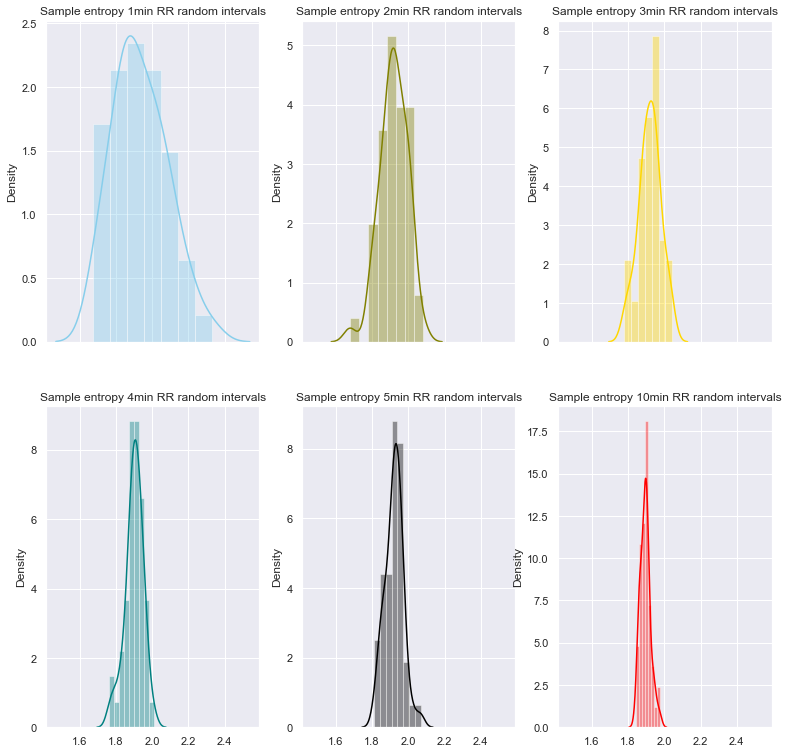

In [149]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Minutenweise)
import seaborn as sns

sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_1min_inter ,bins='auto', color="skyblue", ax=axes[0, 0]).set_title('Sample entropy 1min RR random intervals')
sns.distplot(RR_2min_inter ,bins='auto', color="olive", ax=axes[0, 1]).set_title('Sample entropy 2min RR random intervals')
sns.distplot(RR_3min_inter ,bins='auto', color="gold", ax=axes[0, 2]).set_title('Sample entropy 3min RR random intervals')
sns.distplot(RR_4min_inter ,bins='auto', color="teal", ax=axes[1, 0]).set_title('Sample entropy 4min RR random intervals')
sns.distplot(RR_5min_inter ,bins='auto', color="black", ax=axes[1, 1]).set_title('Sample entropy 5min RR random intervals')
sns.distplot(RR_10min_inter ,bins='auto', color="red", ax=axes[1, 2]).set_title('Sample entropy 10min RR random intervals')
plt.show()


C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kamde\AppData\Local\Continuum\anaconda3\envs\ReseauxNeuronal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a futur

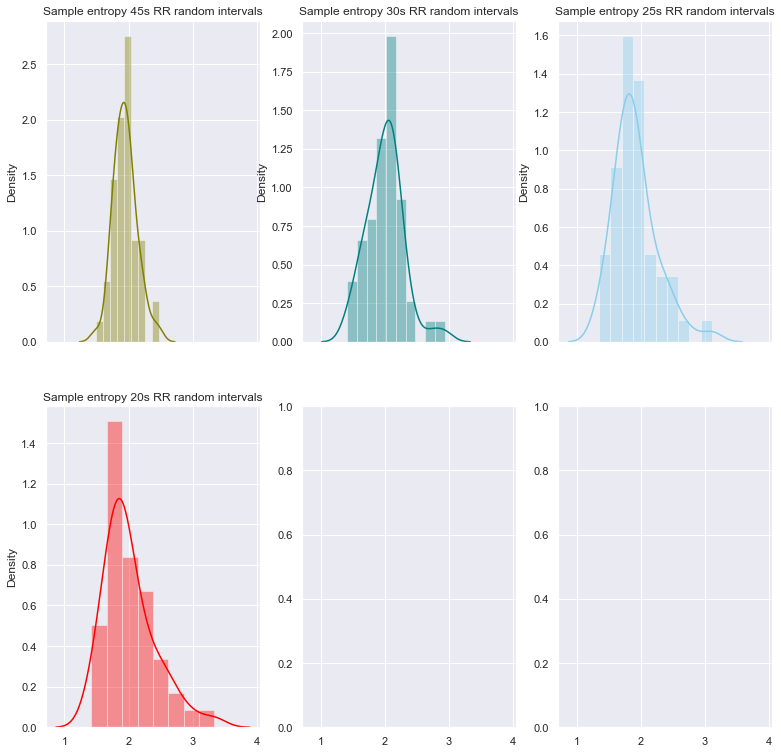

In [152]:
# Histograms der sample entropies generiert aus den random Zeitintervals(Sekundenweise)
sns.set_theme()
f, axes = plt.subplots(2, 3, figsize=(13, 13), sharex=True)
sns.distplot(RR_45s_inter ,bins='auto', color="olive", ax=axes[0, 0]).set_title('Sample entropy 45s RR random intervals')
sns.distplot(RR_30s_inter ,bins='auto', color="teal", ax=axes[0, 1]).set_title('Sample entropy 30s RR random intervals')
sns.distplot(RR_25s_inter ,bins='auto', color="skyblue", ax=axes[0, 2]).set_title('Sample entropy 25s RR random intervals')
sns.distplot(RR_20s_inter ,bins='auto', color="red", ax=axes[1, 0]).set_title('Sample entropy 20s RR random intervals')
#sns.distplot(RR_15s_inter ,bins='auto', color="gold", ax=axes[1, 1]).set_title('Sample entropy 15s RR random intervals')
#sns.distplot(RR_10s_inter ,bins='auto', color="black", ax=axes[1, 2]).set_title('Sample entropy 10s RR random intervals')
plt.show()
